## Data General Exploration

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# load data
df = pd.read_csv('/content/drive/MyDrive/Text Sentiment Lab/Dataset/SuicideAndDepression_Detection.csv')

In [3]:
# show first 10 rows
df.head(10)

,text,class
0,Does life actually work for most / non-depress...,depression
1,I found my friend's bodyIt was almost nine yea...,depression
2,Ex Wife Threatening SuicideRecently I left my ...,SuicideWatch
3,Am I weird I don't get affected by compliments...,teenagers
4,Finally 2020 is almost over... So I can never ...,teenagers
5,"Reddit, I've never opened up to anyone with my...",depression
6,Somebody help me.I just had a terrible episode...,depression
7,I can't do this anymoreI've hidden away all su...,depression
8,i need helpjust help me im crying so hard,SuicideWatch
9,"I’m so lostHello, my name is Adam (16) and I’v...",SuicideWatch


In [4]:
# show last 10 rows
df.tail(10)

,text,class
348114,I did something today I went sledding with my ...,teenagers
348115,when you just need a hugI've been really depre...,depression
348116,If you don't like rock then your not going to ...,teenagers
348117,I drink... A lot. And I like itI'm only 19 yea...,depression
348118,Sleep cycle does not existOn my days off I usu...,depression
348119,You how you can tell i have so many friends an...,teenagers
348120,pee probably tastes like salty tea😏💦‼️ can som...,teenagers
348121,The usual stuff you find hereI'm not posting t...,SuicideWatch
348122,"I confronted my mother. Extremely isolated, wi...",depression
348123,I still haven't beaten the first boss in Hollo...,teenagers


In [5]:
# show data dimensions
df.shape

(348124, 2)

In [6]:
# show data types
df.dtypes

text     object
class    object
dtype: object

In [8]:
# show overall data description
df.describe()

,text,class
count,348123,348110
unique,348123,3
top,Does life actually work for most / non-depress...,SuicideWatch
freq,1,116037


In [7]:
# check value counts of 3 classes
df['class'].value_counts()

SuicideWatch    116037
teenagers       116037
depression      116036
Name: class, dtype: int64

In [9]:
# check missing values
df.isnull().sum()

text      1
class    14
dtype: int64

In [10]:
# check duplicates
df.duplicated().sum()

0

## Data Cleaning

In [11]:
# change class label
df['class'] = df['class'].replace({'teenagers' : 'normal', 'SuicideWatch' : 'suicide'})
df['class'].value_counts()

suicide       116037
normal        116037
depression    116036
Name: class, dtype: int64

In [12]:
# drop missing values
df = df.dropna()
df.isnull().sum()

text     0
class    0
dtype: int64

In [13]:
# drop duplicated although detected 0 duplicate (double check)
df = df.drop_duplicates()
df.duplicated().sum()

0

In [14]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 14.0 MB/s eta 0:00:00


In [15]:
pip install wordninja

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.6/541.6 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wordninja: filename=wordninja-2.0.0-py3-none-any.whl size=541530 sha256=2d6734a517320bf5bc9bdbf086b0199d4b362b69bf1c5d8717c4374696b24bd5
  Stored in directory: /root/.cache/pip/wheels/aa/44/3a/f2a5c1859b8b541ded969b4cd12d0a58897f12408f4f51e084
Successfully built wordninja


## Text Cleaning (Text Column)

In [16]:
import pandas as pd
import re
import contractions
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [17]:
# change apostrophe
def replace_apostrophe(text):
    return text.replace("’", "'")

# lowercase text
def lowercase_text(text):
    return text.lower()

df['text'] = df['text'].apply(lowercase_text)
df['text'] = df['text'].apply(replace_apostrophe)
df.head(10)


,text,class
0,does life actually work for most / non-depress...,depression
1,i found my friend's bodyit was almost nine yea...,depression
2,ex wife threatening suiciderecently i left my ...,suicide
3,am i weird i don't get affected by compliments...,normal
4,finally 2020 is almost over... so i can never ...,normal
5,"reddit, i've never opened up to anyone with my...",depression
6,somebody help me.i just had a terrible episode...,depression
7,i can't do this anymorei've hidden away all su...,depression
8,i need helpjust help me im crying so hard,suicide
9,"i'm so losthello, my name is adam (16) and i'v...",suicide


In [18]:
import pandas as pd
import wordninja
import re

# Apply word segmentation tot he 'text' column in the DataFrame
df['text'] = df['text'].apply(lambda x: ' '.join(wordninja.split(x)))
df.head(10)

,text,class
0,does life actually work for most non depressed...,depression
1,i found my friend's body it was almost nine ye...,depression
2,ex wife threatening suicide recently i left my...,suicide
3,am i weird i don't get affected by compliments...,normal
4,finally 2020 is almost over so i can never hea...,normal
5,reddit i've never opened up to anyone with my ...,depression
6,somebody help me i just had a terrible episode...,depression
7,i can't do this anymore i've hidden away all s...,depression
8,i need help just help me im crying so hard,suicide
9,i'm so lost hello my name is adam 16 and i've ...,suicide


In [19]:
# expand the words like cnnt to cannot / ve to have and so on
def expand_contractions(text):

    expanded_text = contractions.fix(text)
    return expanded_text

df['text'] = df['text'].apply(expand_contractions)
df.head(10)


,text,class
0,does life actually work for most non depressed...,depression
1,i found my friend's body it was almost nine ye...,depression
2,ex wife threatening suicide recently i left my...,suicide
3,am i weird i do not get affected by compliment...,normal
4,finally 2020 is almost over so i can never hea...,normal
5,reddit i have never opened up to anyone with m...,depression
6,somebody help me i just had a terrible episode...,depression
7,i cannot do this anymore i have hidden away al...,depression
8,i need help just help me i am crying so hard,suicide
9,i am so lost hello my name is adam 16 and i ha...,suicide


In [20]:
# Remove words equal to or less than 2 characters in length
def remove_short_words(text):
    return ' '.join([word for word in text.split() if len(word) > 2])

# remove symbols
def remove_symbols(text):
    symbol_pattern = re.compile(r'[\(\)\[\]:]')
    return symbol_pattern.sub('', text)

# remove symbols and digits
def remove_symbols_digits(text):
    return re.sub('[^a-zA-Z\s]', ' ', text)

# remove emoji
def remove_emoji(text):
    return re.sub(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U0001FB00-\U0001FBFF\U0001FE00-\U0001FE0F\U0001F004]+', '', text)

# remove URLs
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

# remove HTML tags
def remove_html_tags(text):
    return re.sub(r'<[^>]+>', '', text)

# remove extra whitespace
def remove_whitespace(text):
    return ' '.join(text.split())

# remove punctuation
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

# remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    return ' '.join([token for token in text.split() if token.lower() not in stop_words])

# lemmatizing text
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(token) for token in text.split()])

# Apply preprocessing techniques sequentially
df['text'] = df['text'].apply(remove_short_words)
df['text'] = df['text'].apply(remove_html_tags)
df['text'] = df['text'].apply(remove_urls)
df['text'] = df['text'].apply(remove_emoji)
df['text'] = df['text'].apply(remove_symbols_digits)
df['text'] = df['text'].apply(remove_symbols)
df['text'] = df['text'].apply(remove_punctuation)
df['text'] = df['text'].apply(remove_stopwords)
df['text'] = df['text'].apply(lemmatize_text)
df['text'] = df['text'].apply(remove_whitespace)


In [21]:
df.head(10)

,text,class
0,life actually work non depressed people seem p...,depression
1,found friend body almost nine year ago still t...,depression
2,wife threatening suicide recently left wife go...,suicide
3,weird get affected compliment coming someone k...,normal
4,finally almost never hear bad year ever swear ...,normal
5,reddit never opened anyone life problem much h...,depression
6,somebody help terrible episode tonight feel ho...,depression
7,cannot anymore hidden away summer room cannot ...,depression
8,need help help cry hard,suicide
9,lost hello name adam struggling year afraid pa...,suicide


## Tokenize

In [22]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# tokenize text
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Apply tokenization to the text column in the DataFrame
df['text'] = df['text'].apply(tokenize_text)

df.head(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,text,class
0,"[life, actually, work, non, depressed, people,...",depression
1,"[found, friend, body, almost, nine, year, ago,...",depression
2,"[wife, threatening, suicide, recently, left, w...",suicide
3,"[weird, get, affected, compliment, coming, som...",normal
4,"[finally, almost, never, hear, bad, year, ever...",normal
5,"[reddit, never, opened, anyone, life, problem,...",depression
6,"[somebody, help, terrible, episode, tonight, f...",depression
7,"[can, not, anymore, hidden, away, summer, room...",depression
8,"[need, help, help, cry, hard]",suicide
9,"[lost, hello, name, adam, struggling, year, af...",suicide


In [23]:
from nltk.corpus import words
import nltk

# Download the list of English words (if not already downloaded)
nltk.download('words')

# Load the set of English words
english_words = set(words.words())

# List of words to exclude from removal
words_to_exclude = {'fuck'}  # Add your specific words here

# Function to remove non-English words from a list of tokens
def remove_non_english(tokens):
    english_tokens = [
        token if (token in english_words or token in words_to_exclude) else ''
        for token in tokens]
    return [token for token in english_tokens if token != '']

# Apply the function to the 'text' column in the DataFrame
df['text'] = df['text'].apply(remove_non_english)
df.head(10)

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


,text,class
0,"[life, actually, work, non, depressed, people,...",depression
1,"[found, friend, body, almost, nine, year, ago,...",depression
2,"[wife, threatening, suicide, recently, left, w...",suicide
3,"[weird, get, affected, compliment, coming, som...",normal
4,"[finally, almost, never, hear, bad, year, ever...",normal
5,"[never, anyone, life, problem, much, help, lit...",depression
6,"[somebody, help, terrible, episode, tonight, f...",depression
7,"[can, not, hidden, away, summer, room, can, no...",depression
8,"[need, help, help, cry, hard]",suicide
9,"[lost, hello, name, struggling, year, afraid, ...",suicide


In [24]:
# join the tokens data back to detoken then check duplicated as tokens data is list cant check duplicated
df['text'] = df['text'].apply(lambda tokens: ' '.join(tokens))
df.duplicated().sum()

1497

In [25]:
# review duplicated
df[df.duplicated()]

,text,class
1662,,normal
4716,anyone want talk,normal
5511,,normal
5880,,normal
6768,,normal
...,...,...
346904,,normal
346920,,normal
347112,horny,normal
347507,anyone want chat want chat,normal


In [26]:
# review one of the duplicate row
df[df['text'] == 'horny']

,text,class
139453,horny,normal
347112,horny,normal


In [27]:
#drop duplicates
df = df.drop_duplicates()

In [28]:
# doublecheck missing values as after text cleaning might have blank data
df.isnull().sum()

text     0
class    0
dtype: int64

In [29]:
#check empty string
df[df['text'] == '']

,text,class
608,,normal
10377,,depression
11019,,suicide


In [30]:
#filter empty string
df = df[df['text'] != '']
df.shape

(346609, 2)

In [31]:
#last check without token data
df.isnull().sum()

text     0
class    0
dtype: int64

In [32]:
#last check without token data
df.duplicated().sum()

0

In [33]:
# Apply tokenization to the text column in the DataFrame
df['text'] = df['text'].apply(tokenize_text)
df.head()

,text,class
0,"[life, actually, work, non, depressed, people,...",depression
1,"[found, friend, body, almost, nine, year, ago,...",depression
2,"[wife, threatening, suicide, recently, left, w...",suicide
3,"[weird, get, affected, compliment, coming, som...",normal
4,"[finally, almost, never, hear, bad, year, ever...",normal


# EDA

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

## Word length histogram


In [35]:
# find the highest number of token in a row
max = 0
for row in df['text']:
  if (len(row) > max):
    max = len(row)


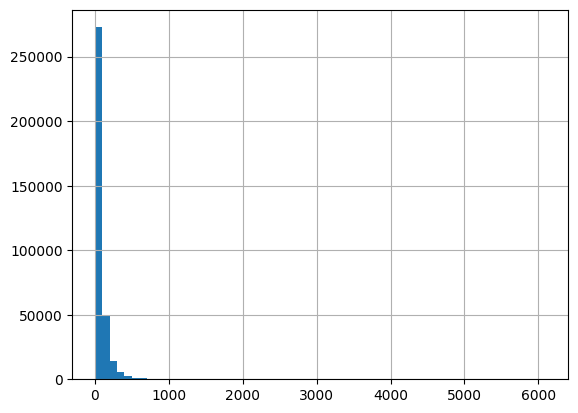

In [36]:
df['text'].map(lambda x: len(x)).hist(bins=range(0, max, 100))

<Axes: >

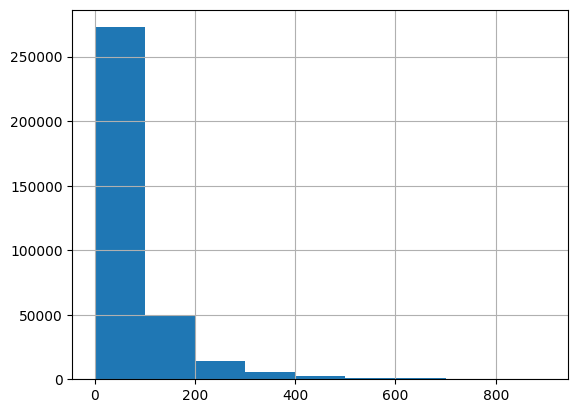

In [37]:
df['text'].map(lambda x: len(x)).hist(bins=range(0, 1000, 100))

In [38]:
# remove outlier
# Filter rows based on length less than or equal to 800
df_filtered = df[df['text'].apply(lambda x: len(x) <= 800)]

# If you want to reset index after filtering
df_filtered.reset_index(drop=True, inplace=True)

## Visualization Suicide Vs Non-Suicide

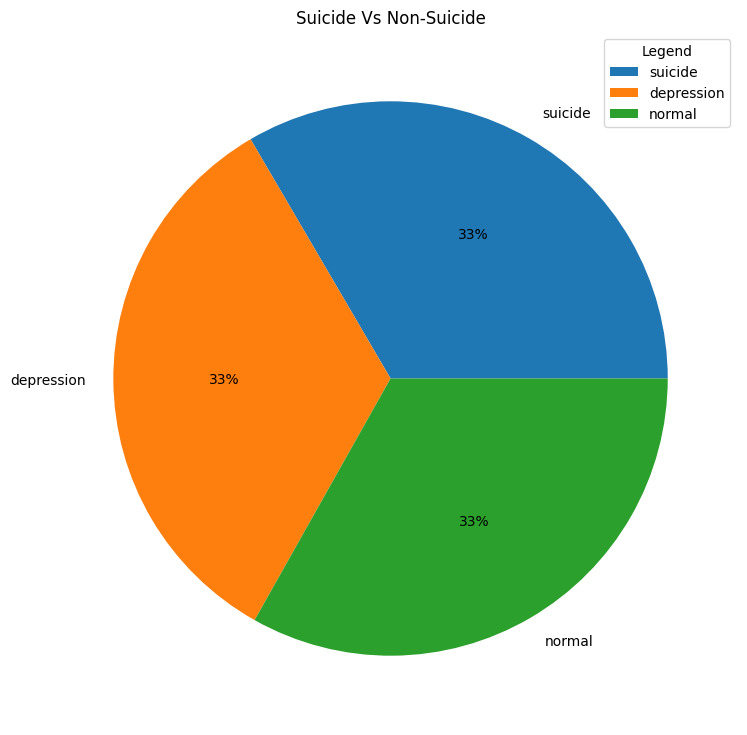

In [53]:
dfClass = df_filtered['class'].value_counts()
plt.figure(figsize = ((20,9)))
plt.pie(dfClass,labels = dfClass.index,autopct='%.0f%%')
plt.title('Suicide Vs Non-Suicide')
plt.legend(dfClass.index, title='Legend', loc='upper right')
plt.show()

## Word Freqency

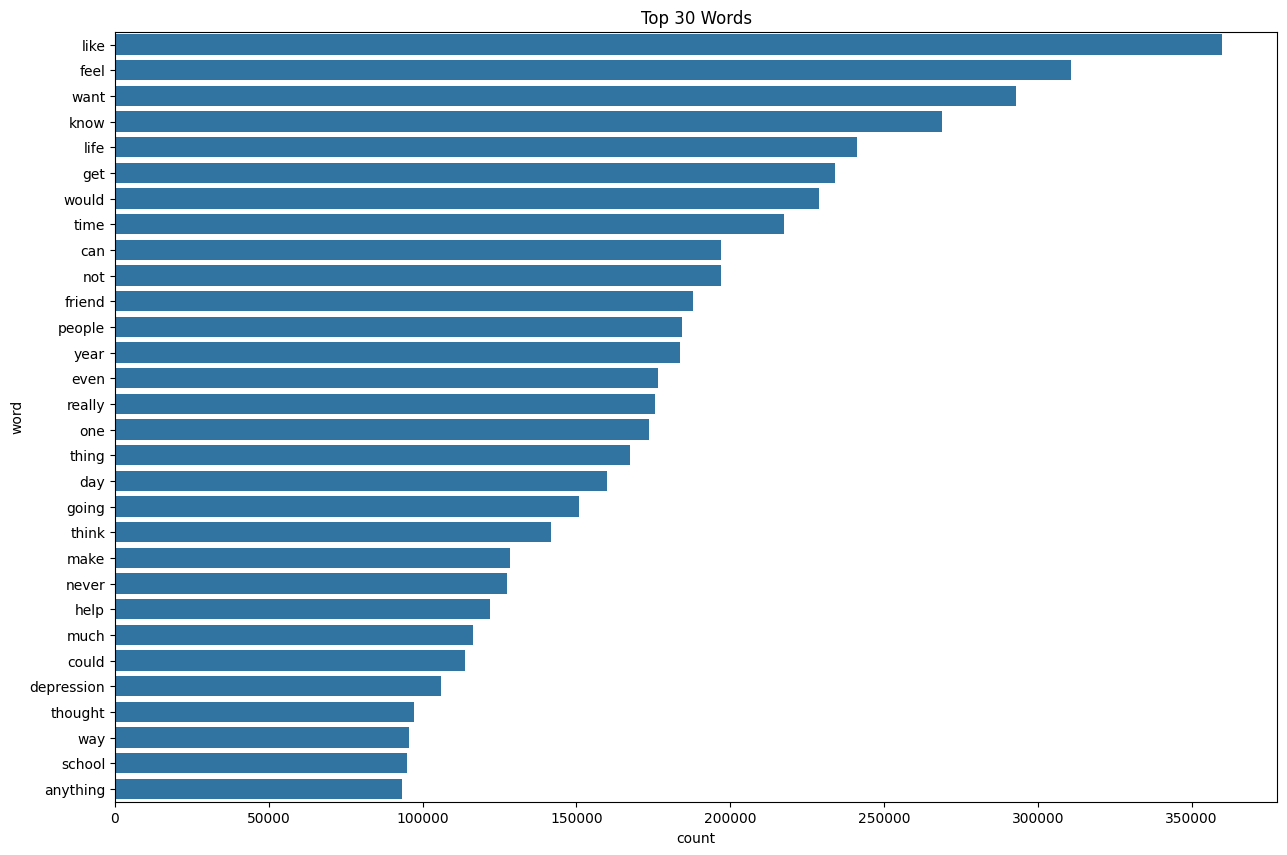

In [40]:
from nltk.probability import FreqDist
# Tokenize using NLTK
corpus = [text for text in df_filtered['text']]

# Flatten the list of tokens
corpus_flat = [word for sublist in corpus for word in sublist]

# Compute word frequencies using NLTK's FreqDist
word_freq = FreqDist(corpus_flat)

# Convert FreqDist to DataFrame
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['word', 'count']).sort_values(by='count', ascending=False)

plt.figure(figsize=(15,10))
sns.barplot(x='count',y='word',data=word_freq_df.head(30))
plt.title('Top 30 Words')
plt.show()

## Word cloud


In [41]:
# join the tokens data back to detoken then check duplicated as tokens data is list cant check duplicated
# This is neccessary to create a corpus for word cloud
df_string = df_filtered.copy()
df_string['text'] = df_string['text'].apply(lambda tokens: ' '.join(tokens))



In [46]:
from wordcloud import WordCloud

### Overall

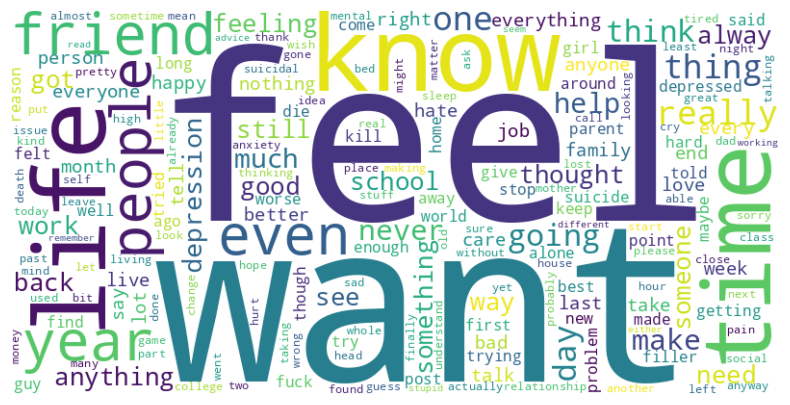

In [47]:
text = ' '.join(df_string['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white',collocations=False).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Suicide

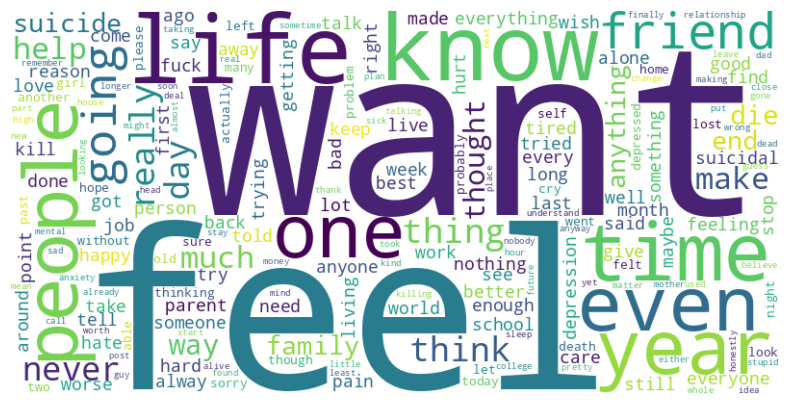

In [54]:
text = ' '.join(df_string.loc[df_string['class'] == 'suicide']['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white',collocations=False).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Depression

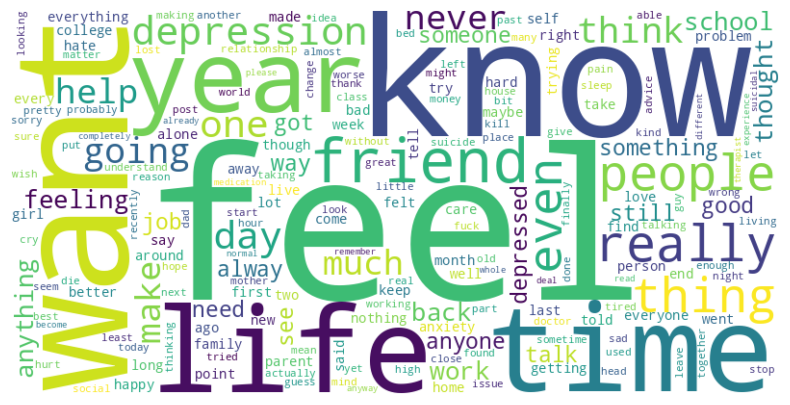

In [55]:
text = ' '.join(df_string.loc[df_string['class'] == 'depression']['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white',collocations=False).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Normal

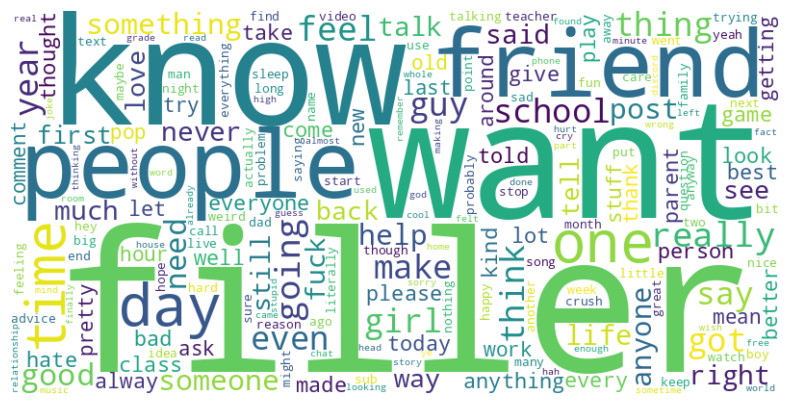

In [56]:
text = ' '.join(df_string.loc[df_string['class'] == 'normal']['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white',collocations=False).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## N-Gram Exploration

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

In [58]:
def _get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                    for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

### Bigram

<Axes: >

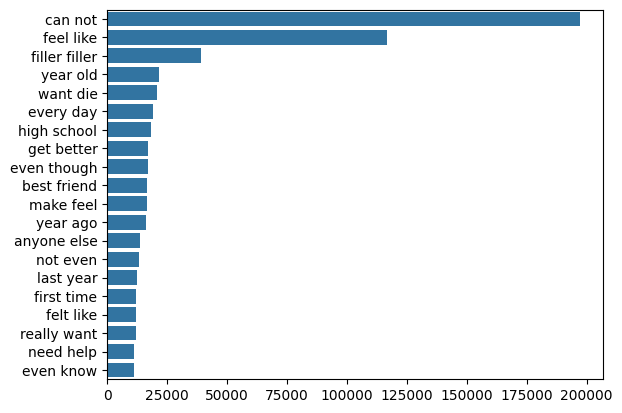

In [59]:
top_n_bigrams=_get_top_ngram(df_string['text'],2)
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

### Trigram

<Axes: >

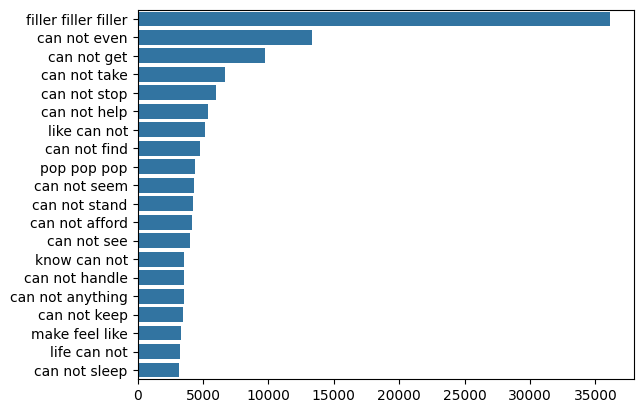

In [60]:
top_n_bigrams=_get_top_ngram(df_string['text'],3)
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

In [44]:
# save cleaned csv (WITH TOKENIZE)
df_filtered.to_csv("cleaned_SuicideAndDepression_detection_with_Token.csv", index=False)

In [45]:
# save cleaned csv (WITHOUT TOKENIZE)
df_string.to_csv("cleaned_SuicideAndDepression_detection_without_Token.csv", index=False)